<a href="https://colab.research.google.com/github/mr-ankit-tech/Coding_with_llm/blob/main/Super_Agent_for_getting_insight.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# # REQUIRED INSTALLS (if not already done)
# !pip install langchain langchain_openai langchain_community
# !pip install transformers accelerate bitsandbytes
# !pip install huggingface_hub
# !pip install langchain-huggingface

# # === Python Imports ===
# import os
# import sqlite3
# import pandas as pd
# from langchain.chat_models import ChatOpenAI
# from langchain.sql_database import SQLDatabase
# from langchain.prompts import PromptTemplate
# from google.colab import userdata, data_table
# from IPython.display import display
# from datetime import datetime # Import datetime

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.2/69.2 kB 812.6 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 438.9/438.9 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.2/45.2 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 5.2 MB/s eta 0:00:00
  Attempting uninstall: langchain-core
    Found existing installation: langchain-core 0.3.65
    Uninstalling langchain-core-0.3.65:
      Successfully uninstalled langchain-core-0.3.65
  Attempting uninstall: langchain
    Found existing installation: langchain 0.3.25
    Uninstalling langchain-0.3.25:
      Successfully uninstalled langchain-0.3.25
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.0/67.0 MB 15.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━

In [ ]:
# # === Load Data into SQLite ===
# daily_data_df = pd.read_csv("/content/Heartbeat.csv")
# sqlite_connection = sqlite3.connect("ankit_tutorial.db")
# db_path = os.path.abspath("ankit_tutorial.db")
# daily_data_df.to_sql("Heartbeat", sqlite_connection, if_exists="replace")

# daily_data_df = pd.read_csv("/content/Audit.csv")
# sqlite_connection = sqlite3.connect("ankit_tutorial.db")
# db_path = os.path.abspath("ankit_tutorial.db")
# daily_data_df.to_sql("Audit", sqlite_connection, if_exists="replace")


4013

In [ ]:

# # === Initialize ChatOpenAI ===
# OPENAI_API_KEY = userdata.get('OPENAI_API_KEY')
# llm = ChatOpenAI(openai_api_key=OPENAI_API_KEY, model_name="gpt-3.5-turbo-1106")

# # === Create SQLDatabase Object ===
# my_db = SQLDatabase.from_uri(f"sqlite:///{db_path}")
# #print(f"Tables available to the agent: {my_db.get_table_names()}")

# # === Utility: Dynamic Schema Fetch for a Given Table ===
# def get_table_schema(table_name: str) -> str:
#   db=my_db
#   if table_name not in db.get_table_names():
#     raise ValueError(f"Table '{table_name}' does not exist in the database.")
#   # Pass the table name as a list to get_table_info
#   return db.get_table_info([table_name])

# # === Prompt Template to Generate SQL ===
# sql_prompt_template = PromptTemplate(
#     input_variables=["user_inquiry", "background_info"],
#     template="""
# You are a professional data analyst writing optimized SQLite queries.

# Rules:
# - Do not use SELECT * — only include necessary columns.
# - Use table aliases for clarity if helpful.
# - You can use advanced SQL like:
#   - window functions (ROW_NUMBER(), RANK(), DENSE_RANK())
#   - CTEs (WITH ...)
#   - CASE statements
#   - aggregation with GROUP BY
# - Actual rate = Actual_Revenue / Actual_FFE
# - Booked rate = Booked_Revenue / Booked_FFE
# - Volume means FFE
# - Filter appropriately based on time, country, or trade if user asks for it.

#     {background_info}
#     Question: {user_inquiry}

#     Only return the SQL query, nothing else.
#     """
#     )

# # === Full Function to Handle Dynamic Table & Question ===
# def Super_Agent(table_name: str, user_inquiry: str) -> pd.DataFrame:
#     # Get schema for selected table
#     table_schema = get_table_schema(table_name)
#     background_info = f"""
#     You are a SQLite expert. The following is the schema of the table `{table_name}`.
#     Use only the columns listed below when writing SQL queries.
#     Never use SELECT *.
#     {table_schema}
#     """


#     # Format prompt
#     formatted_prompt = sql_prompt_template.format(
#         background_info=background_info,
#         user_inquiry=user_inquiry
#     )

#     # Generate SQL from LLM
#     sql_query = llm.invoke(formatted_prompt).content.strip()
#     #print("Generated SQL query:")
#     print(sql_query)

#     # Execute SQL
#     conn = sqlite3.connect(db_path)
#     df_result = pd.read_sql_query(sql_query, conn)
#     conn.close()

#     # Show Data
#     data_table.enable_dataframe_formatter()
#     display(df_result)

# #  # === Generate dynamic CSV filename ===
# #     timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
# #     safe_table_name = table_name.replace(" ", "_").lower()
# #     filename = f"Extract_{safe_table_name}_{timestamp}.csv"

# #     # Save to CSV
# #     df_result.to_csv(filename, index=False)
# #     print(f"Data saved to {filename}")

#     #return df_result

In [ ]:
# # You can dynamically change table name and question here

# #user_inquiry = "What is the total volume by Country?"
# #user_inquiry = "What is the total Amount by Load Country?"
# #user_inquiry = "What is the total Actual Revenue by month for I1 - IET Trade?"
# #user_inquiry = "compare actual revenue and booked revenue by trade and also get the percentage difference?"
# #user_inquiry = "Can you please share me the rate(actual_revenue/actual_ffe)  for each loading country"
# #user_inquiry = "Can you please share the booked data for each trade till June and also please add the rate(revenue/ffe) in the output"
# #user_inquiry = "Suggest me the one loading country as per the highest actual rate?"
# #user_inquiry = "Show top 3 loading countries by actual revenue per month"
# user_inquiry = "Find the second highest booked revenue by trade,show the trade also"
# # Data Question
# # Complex Question - Window function queries.
# # Fault tolerance - FFE, Volume should be same for the engine.
# # Insight from the data and suggestion from the Engine.


# Super_Agent("Heartbeat",user_inquiry)
# #Super_Agent("Audit","Can you please share the amount by countries")


SELECT Trade, MAX(Booked_Revenue) AS Second_Highest_Booked_Revenue
FROM Heartbeat
WHERE Booked_Revenue < (SELECT MAX(Booked_Revenue) FROM Heartbeat)
GROUP BY Trade;


,Trade,Second_Highest_Booked_Revenue
0,B3 - WCSA - North America,6.814000e+04
1,C2 - North America-Central America,3.824369e+05
2,I1 - IET,1.604800e+05
3,L7 - Intra NEU,8.921551e+05
4,R1 - Intra Asia,2.022000e+04
5,U2 - Intra Americas,7.237988e+04
6,UG - ECSA - ECSA,8.452756e+05
7,W5 - Intra Africa,2.133837e+06
8,X1 - Europe - French Antilles,2.494262e+05
9,Z1 - Americas - East Africa,4.175325e+06


In [ ]:
from functools import wraps
# === REQUIRED INSTALLS ===
# !pip install langchain langchain_openai langchain_community
# !pip install transformers accelerate bitsandbytes
# !pip install huggingface_hub
# !pip install langchain-huggingface
# !pip install matplotlib
# !pip install gradio matplotlib


# === PYTHON IMPORTS ===
import os, sqlite3
import pandas as pd
import textwrap
from IPython.display import display
from datetime import datetime
from langchain.chains import LLMChain
from langchain.memory import ConversationBufferMemory
from langchain.chat_models import ChatOpenAI
from langchain.sql_database import SQLDatabase
from langchain.prompts import PromptTemplate
from google.colab import userdata, data_table
import matplotlib.pyplot as plt

# Define the desired width for your lines (e.g., 80 characters)
wrap_width = 80

# === LOAD DATA INTO SQLITE ===
db_path = os.path.abspath("ankit_tutorial.db")
sqlite_connection = sqlite3.connect(db_path)

for csv_file, table_name in [("/content/Heartbeat.csv", "Heartbeat"), ("/content/Audit.csv", "Audit")]:
    df = pd.read_csv(csv_file)
    df.to_sql(table_name, sqlite_connection, if_exists="replace", index=False)

sqlite_connection.close()

# === INIT OpenAI + LangChain DB ===
OPENAI_API_KEY = userdata.get('OPENAI_API_KEY')
llm = ChatOpenAI(openai_api_key=OPENAI_API_KEY, model_name="gpt-3.5-turbo-1106")
my_db = SQLDatabase.from_uri(f"sqlite:///{db_path}")


# === MEMORY ===
memory = ConversationBufferMemory(memory_key="chat_history", return_messages=True)

# === PROMPT FOR COMPLEX SQL GENERATION ===
sql_prompt_template = PromptTemplate(
    input_variables=["chat_history","user_inquiry", "background_info"],
    template="""
You are a senior data analyst writing optimized sql queries.

Rules:
- Never use SELECT * — only necessary columns.
- Use table aliases when helpful.
- You can use:
  - window functions (RANK, ROW_NUMBER)
  - CTEs (WITH ...)
  - CASE statements
  - GROUP BY aggregations
- Actual rate = Actual_Revenue / Actual_FFE
- Booked rate = Booked_Revenue / Booked_FFE
- Volume = FFE

Schema:
{background_info}


# Chat History:
 {chat_history}


Question: {user_inquiry}
Return only the SQL query.
"""
)

# === FETCH SCHEMA ===
def get_table_schema(table_name: str) -> str:
    if table_name not in my_db.get_table_names():
        raise ValueError(f"Table '{table_name}' does not exist.")
    return my_db.get_table_info([table_name])

# === VISUALIZATION (optional) ===
def try_visualize(df):
    if df.shape[1] == 2 and pd.api.types.is_numeric_dtype(df.iloc[:, 1]):
        df.plot(kind='bar', x=df.columns[0], y=df.columns[1], legend=False)
        plt.xticks(rotation=45)
        plt.title(f"{df.columns[1]} by {df.columns[0]}")
        plt.tight_layout()
        plt.show()

# === INSIGHT SUMMARY ===
def generate_insight(user_inquiry, df_result):
    prompt = f"""
        User asked: {user_inquiry}
        Here's the data (top 10 rows):
        {df_result.head(10).to_markdown(index=False)}
        Please summarize any key trends, patterns, or insights in simple language:
        """
    return llm.invoke(prompt).content.strip()

# === FOLLOW-UP SUGGESTIONS ===
def suggest_follow_ups(user_inquiry, df_result):
    prompt = f"""
        Given the result for: {user_inquiry}
        And top rows of the data:
        {df_result.head(5).to_markdown(index=False)}
        Suggest 2-3 intelligent follow-up questions for deeper exploration:
      """
    return llm.invoke(prompt).content.strip()


# === MAIN SUPER AGENT FUNCTION ===
def Super_Agent(table_name: str, user_inquiry: str):
    try:
        # Step 1: Fetch Schema
        table_schema = get_table_schema(table_name)
        background_info = f"Table `{table_name}` has the following schema:\n{table_schema}"

        # Step 2: Generate SQL
        # Corrected indentation for the following lines
        formatted_prompt = sql_prompt_template.format(
            background_info=background_info,
            user_inquiry=user_inquiry,
            chat_history=memory.load_memory_variables({})["chat_history"]
        )
        sql_query = llm.invoke(formatted_prompt).content.strip()
        print("🧠 Generated SQL:\n", sql_query)

        # Step 3: Execute Query
        conn = sqlite3.connect(db_path)
        df_result = pd.read_sql_query(sql_query, conn)
        conn.close()

        # Step 4: Display
        data_table.enable_dataframe_formatter()
        display(df_result)

        # Step 5: Visualize (optional)
        try_visualize(df_result)

        # Step 6: Save to CSV
        # timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
        # fname = f"Extract_{table_name}_{timestamp}.csv"
        # df_result.to_csv(fname, index=False)
        # print(f"📁 Saved to: {fname}")

        # Step 7: Generate Insight
        insight = generate_insight(user_inquiry, df_result)
        print("🔍 Insight:\n", textwrap.fill(insight, width=wrap_width))


        # Step 8: Follow-Up Questions
        followups = suggest_follow_ups(user_inquiry, df_result)
        print("\n🤖 Follow-Up Suggestions:\n", followups)

        # Update memory with the interaction (Question and Insight)
        #memory.chat_history.append(f"User: {user_inquiry}\nAssistant (SQL Result Summary): {insight}")
        memory.save_context({"input": user_inquiry}, {"output": insight})

    except Exception as e:
        print("Error:", e)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.2/69.2 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 89.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.2/45.2 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.0/67.0 MB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 64.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 35.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 51.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127

/tmp/ipython-input-1-2133391820.py:40: LangChainDeprecationWarning: The class `ChatOpenAI` was deprecated in LangChain 0.0.10 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-openai package and should be used instead. To use it run `pip install -U :class:`~langchain-openai` and import as `from :class:`~langchain_openai import ChatOpenAI``.
  llm = ChatOpenAI(openai_api_key=OPENAI_API_KEY, model_name="gpt-3.5-turbo-1106")
/tmp/ipython-input-1-2133391820.py:45: LangChainDeprecationWarning: Please see the migration guide at: https://python.langchain.com/docs/versions/migrating_memory/
  memory = ConversationBufferMemory(memory_key="chat_history", return_messages=True)


/tmp/ipython-input-1-2133391820.py:80: LangChainDeprecationWarning: The method `SQLDatabase.get_table_names` was deprecated in langchain-community 0.0.1 and will be removed in 1.0. Use :meth:`~get_usable_table_names` instead.
  if table_name not in my_db.get_table_names():


🧠 Generated SQL:
 WITH ranked_revenue AS (
  SELECT 
    Trade,
    Booked_Revenue,
    RANK() OVER (ORDER BY Booked_Revenue DESC) AS revenue_rank
  FROM Heartbeat
)
SELECT 
  Trade,
  Booked_Revenue
FROM ranked_revenue
WHERE revenue_rank = 2;


,Trade,Booked_Revenue
0,Z1 - Americas - East Africa,4175325.0


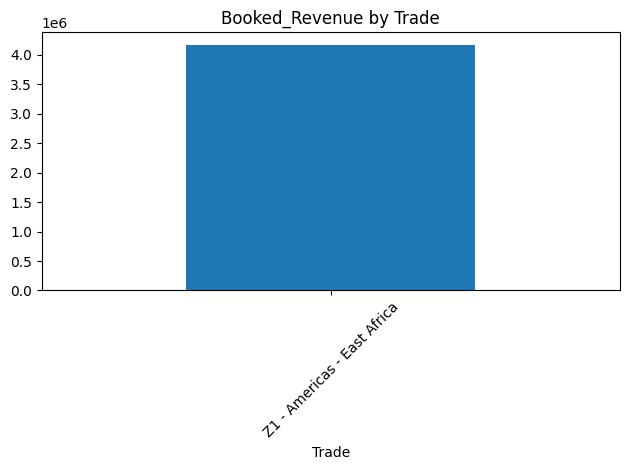

🔍 Insight:
 The second highest booked revenue by trade is 4.17532e+06 for the trade Z1 -
Americas - East Africa. This indicates that this trade is performing well in
terms of revenue generation. It would be helpful to analyze other trades to see
if there are any patterns or trends in revenue generation across different
trades.

🤖 Follow-Up Suggestions:
 1. What factors contributed to the high booked revenue for the trade "Z1 - Americas - East Africa"? 
2. How does the booked revenue for this trade compare to previous time periods or similar trades in the same region? 
3. Are there any specific products or services driving the high revenue for this trade, and are there opportunities to replicate this success in other regions or markets?


In [ ]:
# === EXAMPLE INTERACTION ===
#user_inquiry = "Compare actual rate and booked rate by country and show top 5 sorted by actual rate"
#Super_Agent("Heartbeat", user_inquiry)

#Super_Agent("Audit", "What is the total Amount by Country?")

Super_Agent("Heartbeat", "Find the second highest booked revenue by trade,show the trade also")
#Super_Agent("Heartbeat","Can you please list down top 5 trade lanes where we have shortfall than actual revenue")
#Super_Agent("Heartbeat", "can you please add the shipment number also?")
#Super_Agent("Heartbeat", "What factors contribute to the significant difference in total volume between different loading countries, such as Argentina and Austria?")

#Super_Agent("Heartbeat","Can you please share the amount by loading countries?")
#Super_Agent("Heartbeat", "Now add the month also")
#Super_Agent("Heartbeat", "Can you please add the discharge country also")
#Super_Agent("Heartbeat", "Remove the month but keep load country")